In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     Unnamed: 0  precision    recall  f1-score  support
0  TCGA-BLCA-NT   1.000000  0.666667  0.800000      6.0
1  TCGA-BLCA-TP   0.984252  1.000000  0.992063    125.0
2  TCGA-BRCA-NT   0.964286  0.870968  0.915254     31.0
3  TCGA-BRCA-TP   0.987915  0.996951  0.992413    328.0
4  TCGA-ESCA-TP   1.000000  1.000000  1.000000     56.0


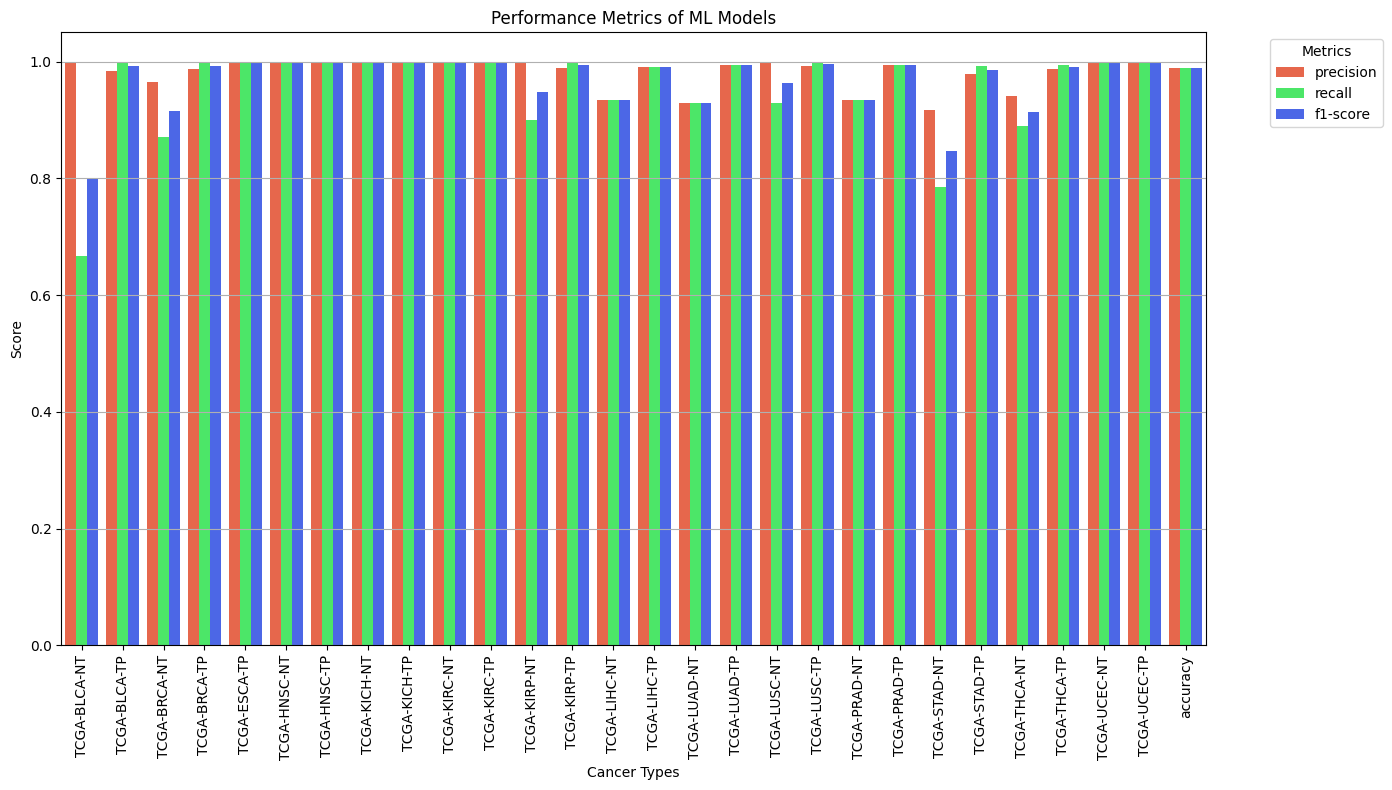

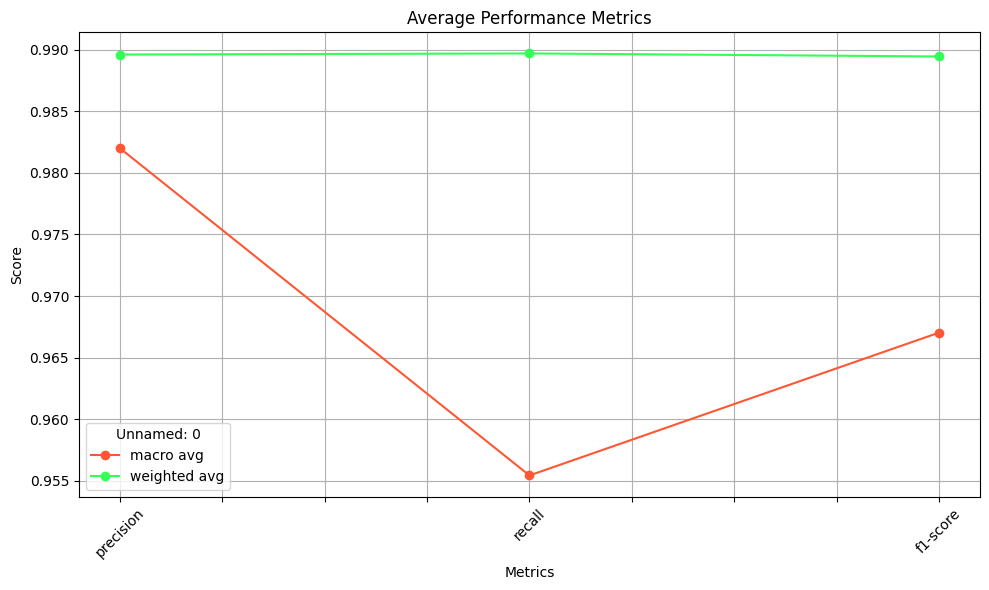

In [6]:
# Load the data from the CSV file
df = pd.read_csv('C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/ensemble/boruta_ensemble/report_ensemble.csv')

# Check the structure of the data
print(df.head())

# Filter out the average rows
metrics = df.loc[~df['Unnamed: 0'].str.contains('avg')]

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for Precision, Recall, and F1-score
metrics_melted = metrics.melt(id_vars=['Unnamed: 0'], value_vars=['precision', 'recall', 'f1-score'],
                               var_name='Metric', value_name='Score')

# Define a vibrant color palette
vibrant_palette = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1']  # Red, Green, Blue, Magenta

# Create the bar plot with the vibrant color palette
sns.barplot(data=metrics_melted, x='Unnamed: 0', y='Score', hue='Metric', palette=vibrant_palette)
plt.title('Performance Metrics of ML Models')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.xlabel('Cancer Types')

# Adjust legend position to avoid overlap
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot area

plt.tight_layout()
plt.grid(axis='y')  # Optional: add grid lines for better readability

# Save the bar plot as a JPEG file with 300 DPI
plt.savefig('C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/ensemble/boruta_ensemble/performance_metrics_bar.jpeg', dpi=300)  # Save with vibrant colors
plt.show()

# Create a line plot for Accuracy, Macro Avg, and Weighted Avg
avg_metrics = df.loc[df['Unnamed: 0'].str.contains('avg')].drop(columns=['support']).set_index('Unnamed: 0').T
avg_metrics.plot(kind='line', marker='o', figsize=(10, 6), color=vibrant_palette)
plt.title('Average Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.grid()

# Save the line plot as a JPEG file with 300 DPI
plt.tight_layout()
plt.savefig('C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/ensemble/boruta_ensemble/average_performance_metrics_line.jpeg', dpi=300)  # Save with vibrant colors
plt.show()


In [52]:
import pandas as pd

# Load the confusion matrix and AUC files
confusion_matrix_df = pd.read_csv('C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/lightGBM/LDA_no_ESCA/cm_lightGBM.csv')
#auc_df = pd.read_csv('C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/ensemble/roc_auc_results.csv')

# Display the contents of the confusion matrix and AUC data
#confusion_matrix_df.head(), auc_df.head()


In [53]:
# Calculate sensitivity and specificity for each class with detailed debugging
sensitivity_list = []
specificity_list = []
class_names = []

# Check the structure of the confusion matrix to ensure it's numeric
confusion_matrix_values = confusion_matrix_df.iloc[:, 1:].values  # Extract numeric values
total_sum = confusion_matrix_values.sum()  # Total sum for TN calculation

# Calculate sensitivity and specificity
for i in range(len(confusion_matrix_df)):
    true_class = confusion_matrix_df.iloc[i, 0]  # True class name
    TP = confusion_matrix_values[i, i]  # True Positives
    FN = confusion_matrix_values[i, :].sum() - TP  # False Negatives
    FP = confusion_matrix_values[:, i].sum() - TP  # False Positives
    TN = total_sum - (TP + FP + FN)  # True Negatives
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    class_names.append(true_class)

# Create DataFrames for plotting
sensitivity_df = pd.DataFrame({'Class': class_names, 'Sensitivity': sensitivity_list})
specificity_df = pd.DataFrame({'Class': class_names, 'Specificity': specificity_list})

# Merge the two DataFrames horizontally
merged_df = pd.merge(sensitivity_df, specificity_df, on='Class')

# Save to CSV
merged_df.to_csv('C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/lightGBM/LDA_no_ESCA/sensitivity_specificity.csv', index=False)


# Merge AUC data
#auc_df = auc_df.rename(columns={'Class': 'Class', 'AUC': 'AUC'})
#metrics_df = sensitivity_df.merge(specificity_df, on='Class').merge(auc_df, on='Class')

# Check the calculated metrics
#metrics_df.head()  # Display the first few rows of the metrics DataFrame


In [28]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the figure size and plot separately for each metric
# for metric in ['Sensitivity', 'Specificity', 'AUC']:
#     plt.figure(figsize=(12, 6))
    
#     sns.barplot(data=metrics_df, x='Class', y=metric, palette=['#FF5733', '#33FF57', '#3357FF'])
#     plt.title(f'{metric} by Class')
#     plt.ylabel('Score')
#     plt.ylim(0, 1)  # Set y-axis limits for clarity
#     plt.xticks(rotation=90)
#     plt.grid(axis='y')
#     plt.tight_layout()

#     # Save the plot
#     plt.savefig(f'C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/ensemble/boruta_ensemble/{metric.lower()}_by_class.jpeg', dpi=300)  # Save each plot
#     plt.show()


<Figure size 1400x800 with 0 Axes>

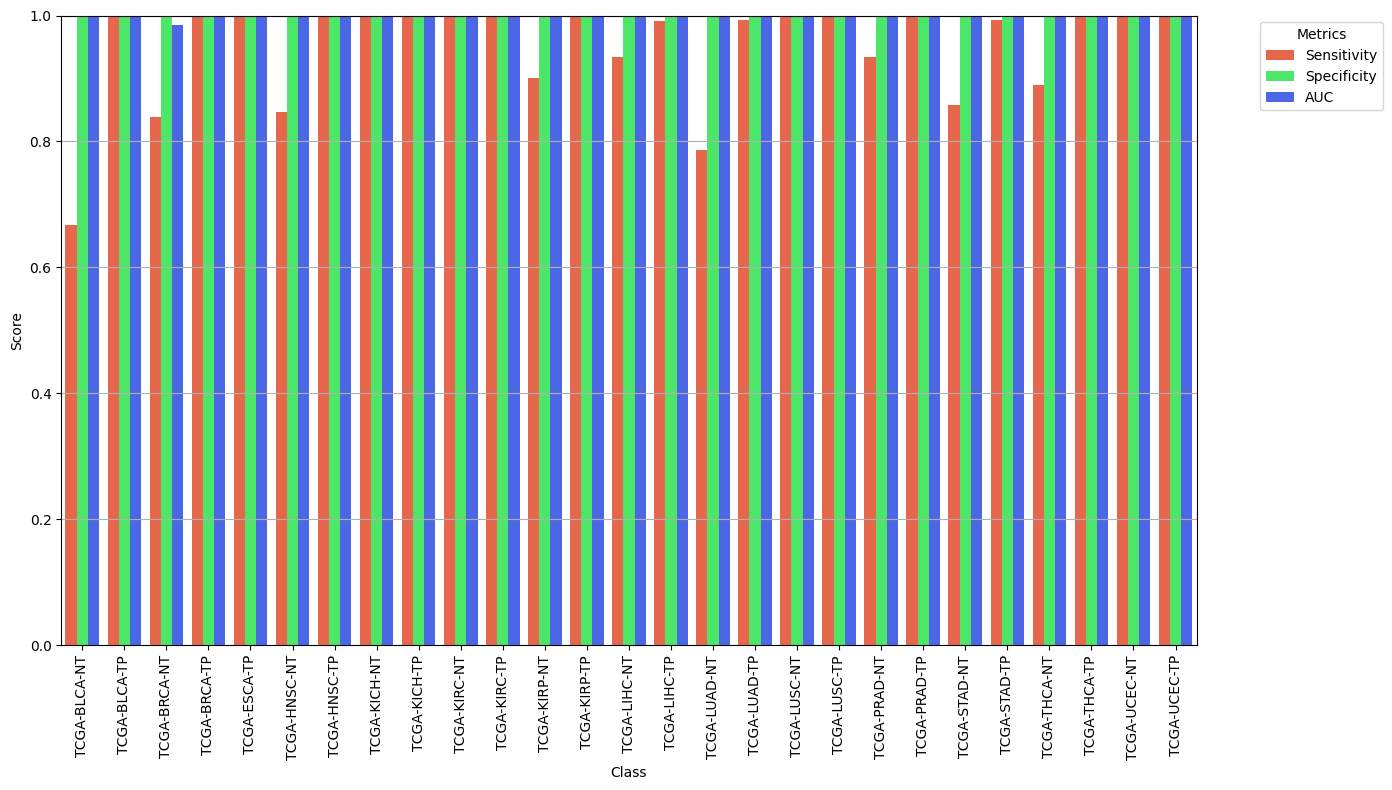

In [40]:
# Reshape the metrics DataFrame to a long format for combined plotting
combined_metrics_df = metrics_df.melt(id_vars='Class', value_vars=['Sensitivity', 'Specificity', 'AUC'],
                                        var_name='Metric', value_name='Score')

# Set the figure size for the combined bar plot
plt.figure(figsize=(14, 8))
#new_color_palette = ['red', 'lawngreen', 'blue']  # Dark blue, dark red, dark orange
# Define a vibrant color palette
vibrant_palette = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1']
# Set the figure size and plot the combined metrics with the new color palette
plt.figure(figsize=(14, 8))

sns.barplot(data=combined_metrics_df, x='Class', y='Score', hue='Metric', palette=vibrant_palette)
# Create the combined bar plot
#sns.barplot(data=combined_metrics_df, x='Class', y='Score', hue='Metric')
plt.title('')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits for clarity
plt.xticks(rotation=90)
plt.legend(title='Metrics', loc='upper left')  # Place legend outside the plot area
plt.grid(axis='y')
# Adjust legend position to avoid overlap
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot area

plt.tight_layout()

# Save the combined plot
plt.savefig('C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/ensemble/combined_metrics_by_class_blue.jpeg', dpi=300)  # Save the plot
plt.show()


In [2]:

# Load the specified sheet "ensemble_model_combined" into a DataFrame
ensemble_data = pd.read_csv('C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/ensemble/ensemble_models_combined.csv')

# Display the first few rows of the DataFrame to understand its structure
ensemble_data.head()




,Response,597_precision,597_recall,597_f1-score,597_Specificity,597_AUC,RFE_precision,RFE_recall,RFE_f1-score,RFE_Specificity,...,Boruta_recall,Boruta_f1-score,Boruta_Specificity,Boruta_AUC,LDA_precision,LDA_recall,LDA_f1-score,LDA_Specificity,LDA_AUC,support
0,TCGA-BLCA-NT,1.00,0.67,0.80,1.0,1.00,1.00,0.83,0.91,1.0,...,0.67,0.80,1.0,1.00,1.00,0.83,0.91,1.0,1.00,6.0
1,TCGA-BLCA-TP,0.98,1.00,0.99,1.0,1.00,0.99,1.00,1.00,1.0,...,1.00,0.99,1.0,1.00,0.99,1.00,1.00,1.0,1.00,125.0
2,TCGA-BRCA-NT,1.00,0.84,0.91,1.0,0.98,0.96,0.87,0.92,1.0,...,0.87,0.92,1.0,0.99,0.96,0.84,0.90,1.0,0.99,31.0
3,TCGA-BRCA-TP,0.98,1.00,0.99,1.0,1.00,0.99,1.00,0.99,1.0,...,1.00,0.99,1.0,1.00,0.98,1.00,0.99,1.0,1.00,328.0
4,TCGA-ESCA-TP,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,...,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,56.0


In [9]:
# Set the correct headers and drop the initial row
#ensemble_data.columns = ensemble_data.iloc[0]
#ensemble_data = ensemble_data.drop(index=0).reset_index(drop=True)

# Display the cleaned DataFrame
#ensemble_data.head()


In [3]:
# Convert relevant metric columns to numeric type
metric_columns = [
    '597_precision', '597_recall', '597_f1-score', '597_Specificity', '597_AUC',
    'RFE_precision', 'RFE_recall', 'RFE_f1-score', 'RFE_Specificity', 'RFE_AUC',
    'RF_precision', 'RF_recall', 'RF_f1-score', 'RF_Specificity', 'RF_AUC',
    'Boruta_precision', 'Boruta_recall', 'Boruta_f1-score', 'Boruta_Specificity', 'Boruta_AUC',
    'LDA_precision', 'LDA_recall', 'LDA_f1-score', 'LDA_Specificity', 'LDA_AUC'
]

# Convert columns to numeric, errors='coerce' will replace non-convertible values with NaN
for col in metric_columns:
    ensemble_data[col] = pd.to_numeric(ensemble_data[col], errors='coerce')

# Display the data types to confirm conversion
ensemble_data.dtypes


Response               object
597_precision         float64
597_recall            float64
597_f1-score          float64
597_Specificity       float64
597_AUC               float64
RFE_precision         float64
RFE_recall            float64
RFE_f1-score          float64
RFE_Specificity       float64
RFE_AUC               float64
RF_precision          float64
RF_recall             float64
RF_f1-score           float64
RF_Specificity        float64
RF_AUC                float64
Boruta_precision      float64
Boruta_recall         float64
Boruta_f1-score       float64
Boruta_Specificity    float64
Boruta_AUC            float64
LDA_precision         float64
LDA_recall            float64
LDA_f1-score          float64
LDA_Specificity       float64
LDA_AUC               float64
support               float64
dtype: object

<Figure size 1200x600 with 0 Axes>

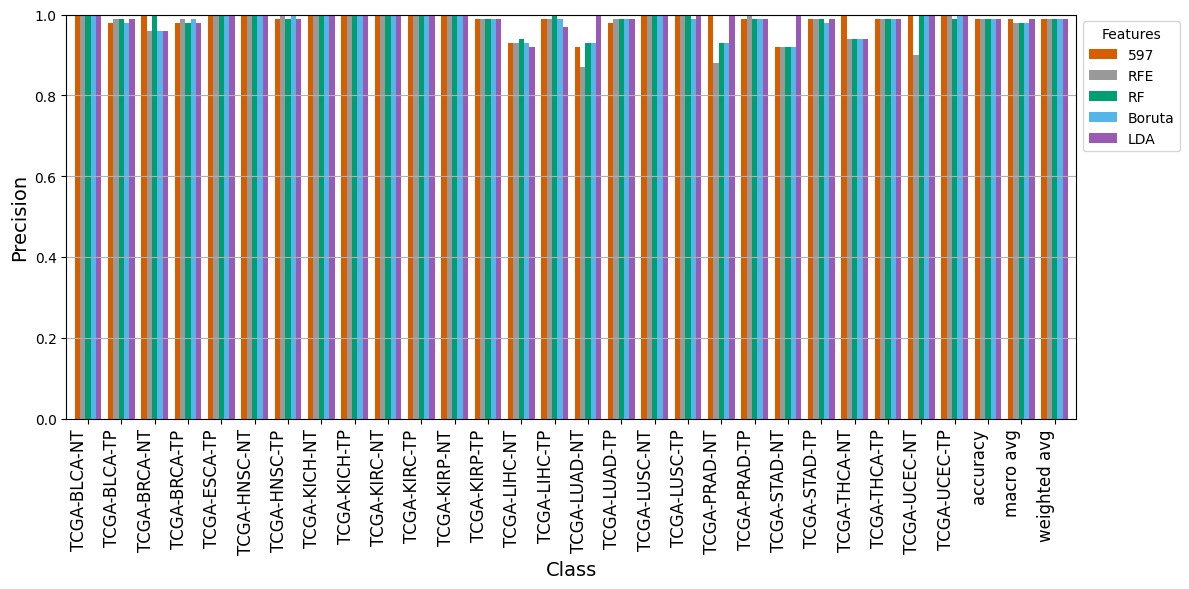

<Figure size 1200x600 with 0 Axes>

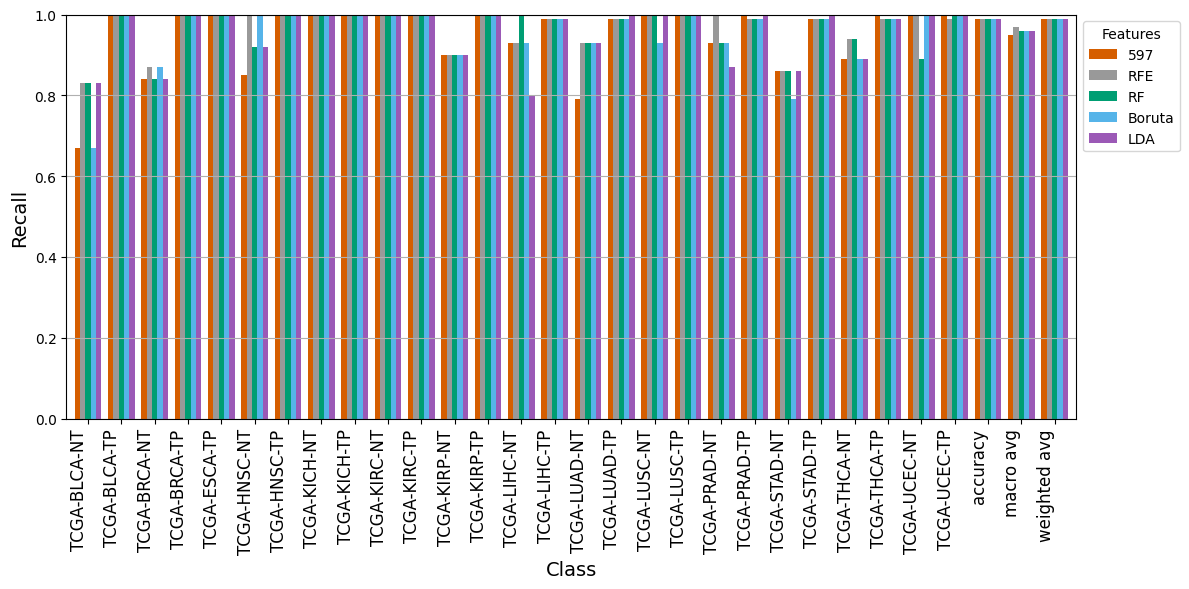

<Figure size 1200x600 with 0 Axes>

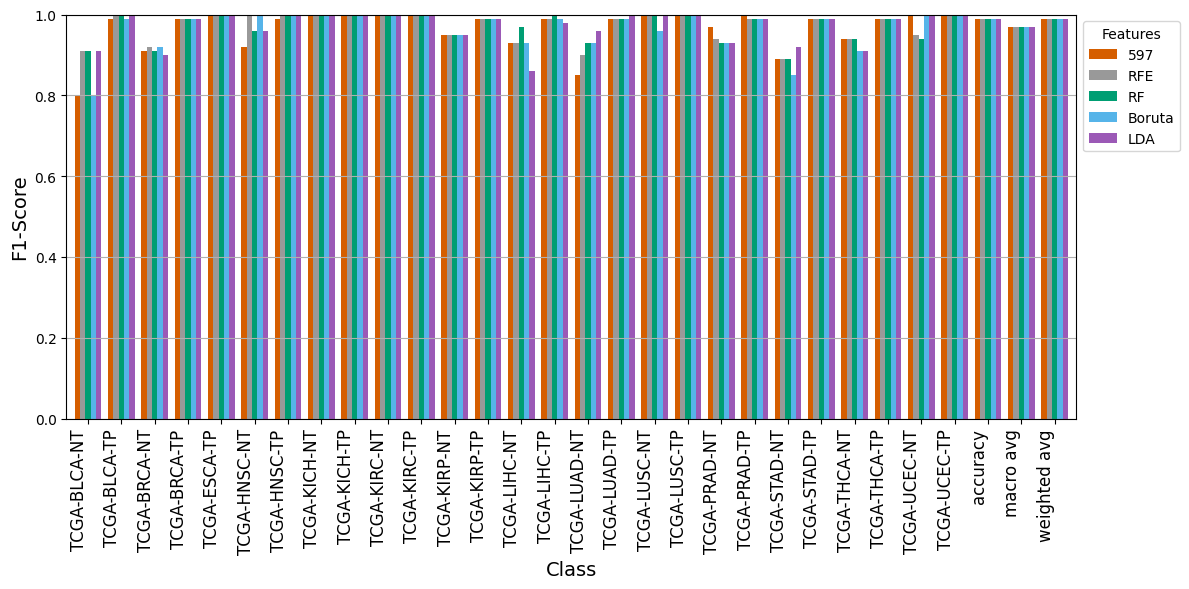

<Figure size 1200x600 with 0 Axes>

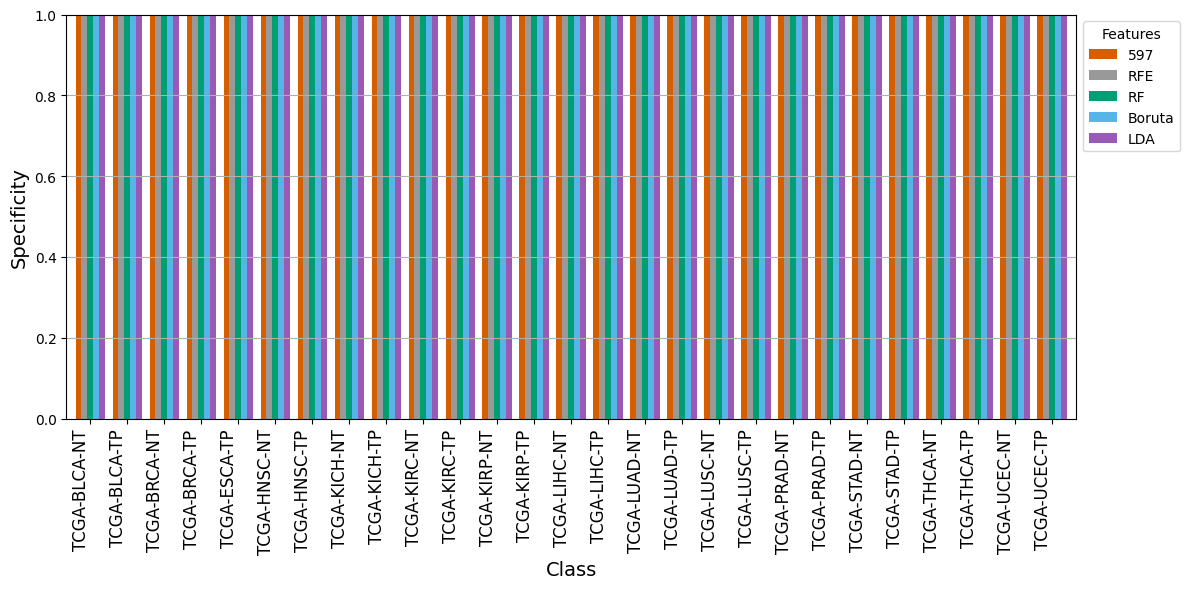

<Figure size 1200x600 with 0 Axes>

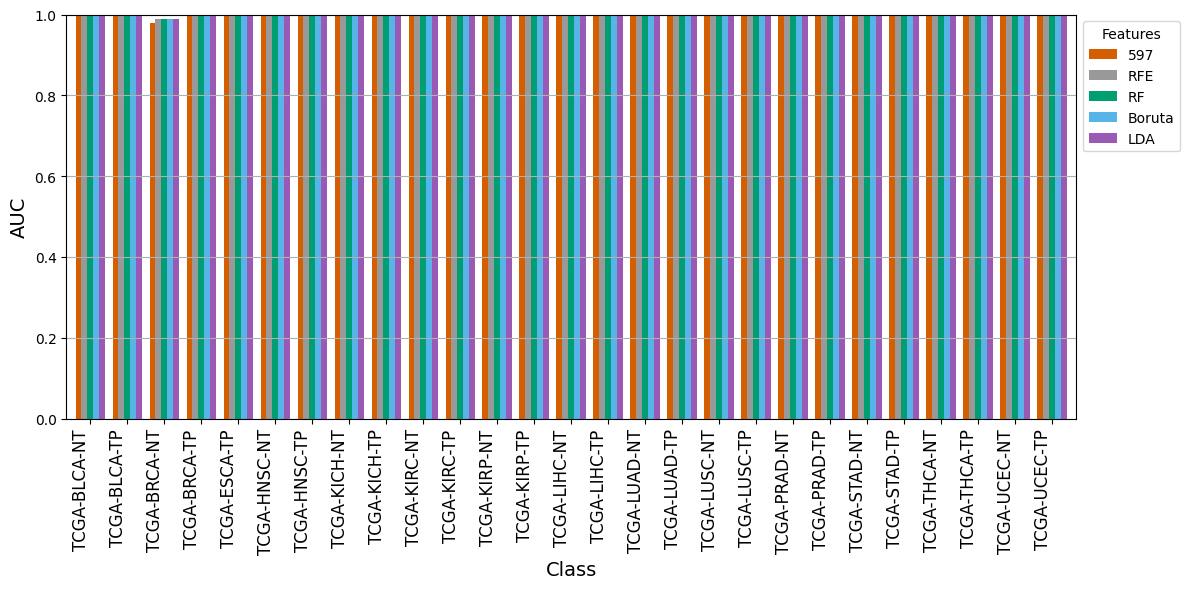

In [7]:
# Define a function to plot each metric with updated bar width and colors
def plot_metric_custom_colors(metric_name):
    plt.figure(figsize=(12, 6))

    # Define expected columns based on the metric
    columns = {
        'Precision': ['597_precision', 'RFE_precision', 'RF_precision', 'Boruta_precision', 'LDA_precision'],
        'Recall': ['597_recall', 'RFE_recall', 'RF_recall', 'Boruta_recall', 'LDA_recall'],
        'F1-Score': ['597_f1-score', 'RFE_f1-score', 'RF_f1-score', 'Boruta_f1-score', 'LDA_f1-score'],
        'Specificity': ['597_Specificity', 'RFE_Specificity', 'RF_Specificity', 'Boruta_Specificity', 'LDA_Specificity'],
        'AUC': ['597_AUC', 'RFE_AUC', 'RF_AUC', 'Boruta_AUC', 'LDA_AUC']
    }[metric_name]

    # Extract the relevant data, dropping rows with NaN values
    metrics_to_plot = ensemble_data[['Response'] + columns].dropna()
    
    # Set 'Response' as the index for better plotting
    metrics_to_plot.set_index('Response', inplace=True)
    
    # Create the bar plot with increased width and distinct colors
    ax = metrics_to_plot.plot(kind='bar', figsize=(12, 6), width=0.8,
                               color=["#D55E00","#999999", "#009E73","#56B4E9", "#9B59B6"]) #['#1f77b4', '#f0a3a3', '#2ca02c','#ff7f0e', '#9467bd'])
    
    #plt.title(f'{metric_name} Comparison by Method')
    plt.ylabel(metric_name, fontsize=14)
    plt.xlabel('Class', fontsize=14)
    plt.ylim(0, 1)
    plt.xticks(rotation=90, ha='right', fontsize=12)
    plt.grid(axis='y')
    
    # Update the legend labels
    ax.legend(['597', 'RFE', 'RF', 'Boruta', 'LDA'], title='Features', loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.savefig(f'C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/ensemble/{metric_name}_comparison.jpg', dpi=300, format='jpeg')
    plt.show()

# Generate separate plots for each metric with updated width and colors
for metric in ['Precision', 'Recall', 'F1-Score', 'Specificity', 'AUC']:
    plot_metric_custom_colors(metric)


NameError: name 'save_plot_and_show' is not defined

<Figure size 1200x600 with 0 Axes>

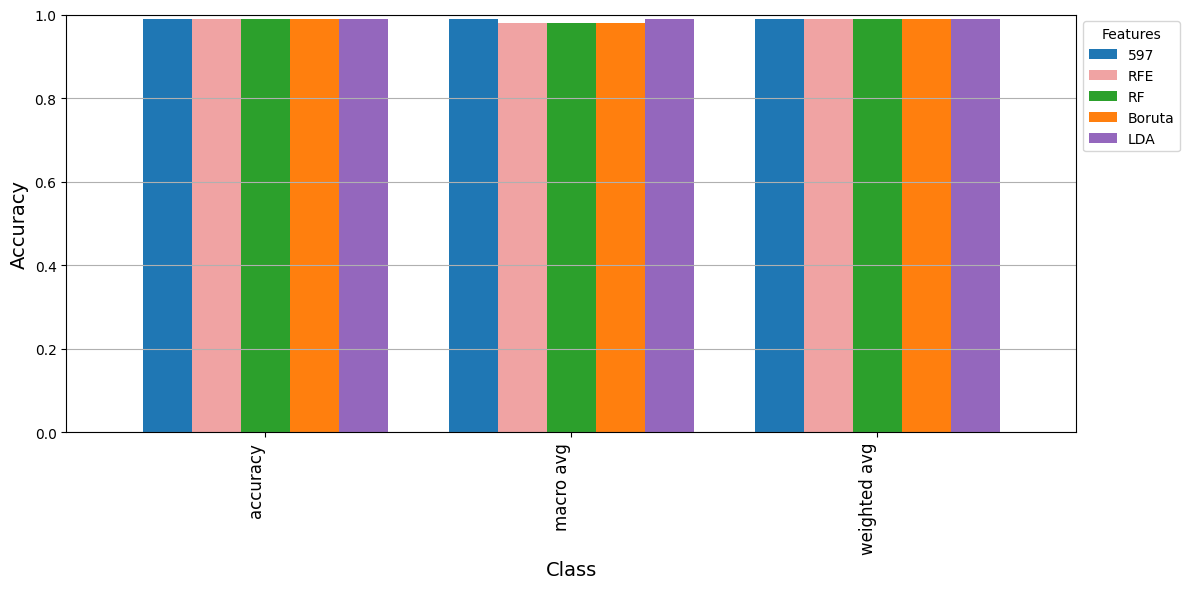

In [16]:
# Extracting the last three rows for accuracy, macro avg, and weighted avg from the precision plot
accuracy_row = ensemble_data.iloc[-3:, :]

# Extract the accuracy, macro avg, and weighted avg values
accuracy_values = accuracy_row[['Response', '597_precision', 'RFE_precision', 'RF_precision', 'Boruta_precision', 'LDA_precision']]
accuracy_values.set_index('Response', inplace=True)

# Plotting the accuracy values
def plot_accuracy_from_precision():
    plt.figure(figsize=(12, 6))
    
    # Create the bar plot with increased width and distinct colors for accuracy
    ax = accuracy_values.plot(kind='bar', figsize=(12, 6), width=0.8,
                              color=['#1f77b4', '#f0a3a3', '#2ca02c','#ff7f0e', '#9467bd'])
    
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Class', fontsize = 14)
    plt.ylim(0, 1)
    plt.xticks(rotation=90, ha='right', fontsize = 12)
    plt.grid(axis='y')
    
    # Update the legend labels
    ax.legend(['597', 'RFE', 'RF', 'Boruta', 'LDA'], title='Features', loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.savefig(f'C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/ensemble/accuracy_comparison.jpg', dpi=300, format='jpeg')
    return save_plot_and_show(plt, "accuracy_from_precision_values.jpg")

# Generate the accuracy plot and return the download link
accuracy_from_precision_values_file = plot_accuracy_from_precision()
accuracy_from_precision_values_file


NameError: name 'save_plot_and_show' is not defined

<Figure size 1200x600 with 0 Axes>

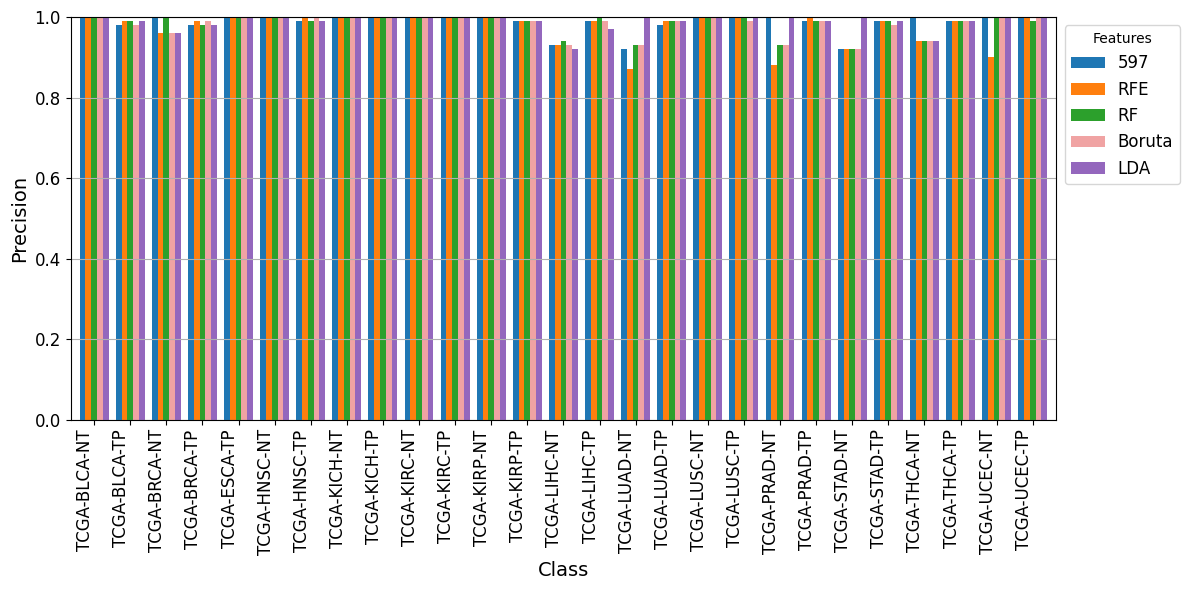

In [17]:
# Exclude the last three rows (accuracy, macro avg, weighted avg) from the precision plot and update it

def plot_precision_without_last_three_rows():
    plt.figure(figsize=(12, 6))

    # Exclude the last three rows (accuracy, macro avg, weighted avg) from the precision data
    precision_data = ensemble_data[:-3][['Response', '597_precision', 'RFE_precision', 'RF_precision', 'Boruta_precision', 'LDA_precision']].dropna()
    
    # Set 'Response' as the index for better plotting
    precision_data.set_index('Response', inplace=True)
    
    # Create the bar plot with increased width and distinct colors
    ax = precision_data.plot(kind='bar', figsize=(12, 6), width=0.8,
                             color=['#1f77b4', '#ff7f0e', '#2ca02c', '#f0a3a3', '#9467bd'])  # Using light color for Boruta
    
    plt.ylabel('Precision', fontsize=14)
    plt.xlabel('Class', fontsize=14)
    plt.ylim(0, 1)
    plt.xticks(rotation=90, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y')
    
    # Update the legend labels and font size
    ax.legend(['597', 'RFE', 'RF', 'Boruta', 'LDA'], title='Features', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

    plt.tight_layout()
    plt.savefig(f'C:/Users/ankita.lawarde/OneDrive - Tartu Ülikool/backup/work/R_work/google_colab_output/ensemble/precision_comparison.jpg', dpi=300, format='jpeg')
    
    return save_plot_and_show(plt, "precision_without_last_three_rows.jpg")

# Generate the precision plot excluding the last three rows and return the download link
precision_without_last_three_rows_file = plot_precision_without_last_three_rows()
precision_without_last_three_rows_file
